In [2]:
import pandas as pd
import numpy as np
import httpx
from tqdm import tqdm

import re

In [3]:
def rate_cc_by_llama(cc):
    url = "http://localhost:11434/api/generate"

    with httpx.Client(timeout=600) as client:
        data_payload = {
            "model": "llama3.1:latest",
            "prompt": f"<s>[INST] You are an emergency department doctor. Please rate the following chief complaint on a scale of 1 to 10, where 10 is most severe. Provide only the rating in your answer. Start your answer with the rating in a numerical format. Like this: [RATING] [Explanation]. For example: 8. The chief complaint is very severe... Here is the chief complaint: {cc} [/INST]",
            "stream": False,
            "options": {"num_predict": 3},
        }

        res = client.post(url, json=data_payload)

        # get response field from the json
        response = res.json()["response"]

        # extract the rating from the response via regex, if none is found, set to -1
        rating = re.search(r"\d+", response)
        if rating:
            rating = rating.group()
        else:
            rating = -1

        return rating

In [8]:
import sys

already_rated = pd.read_csv("../processed_data/cc_llama31_ratings.csv")

# to_rate = already_rated[already_rated['rating'] == -1]
to_rate = already_rated

# call mistral function of rating is -1
for index, row in to_rate.iterrows():
    if row["rating"] == -1:
        rating = rate_cc_by_llama(row["chiefcomplaint"])
        print("\033[F")
        print("\033[K")
        print(
            f'\r {row["chiefcomplaint"]} {rating} {index}/{len(to_rate)}',
            end="",
            flush=False,
        )

        already_rated.loc[index, "rating"] = rating

already_rated.update(to_rate)
already_rated.to_csv("../processed_data/cc_llama31_ratings.csv", index=False)



 Depression, SI -1 25/60407

 Depression -1 100/60407

 DEPRESSION -1 110/60407

 Dizziness, AICD FIRE -1 136/60407

 Vaginal irritation -1 218/60407

 LSD RXN -1 288/60407

 DEPRESSION/SUICIDAL/DELIBERATE SELF HARM -1 306/60407

 Pregnant -1 318/60407

 Depression, AH -1 387/60407

 Labor -1 406/60407

 ASSAULT UNRESP -1 479/60407

 Psych, Depression -1 550/60407

 REFUSING REHAB -1 590/60407

 RLQ abdominal pain, Pregnant 9 612/60407

/tmp/ipykernel_84888/2328048884.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  already_rated.loc[index, "rating"] = rating




 Substance use -1 614/60407

 ICD LEAD FAILURE -1 627/60407

 Psych eval, Psychiatric hold -1 689/60407

 Self inflicted injury, SI -1 698/60407

 S/P ASSUALT -1 768/60407

 ETOH, Insomnia -1 793/60407

 JTUBE PLACEMENT -1 801/60407

 BATERIMIA, Transfer -1 813/60407

 Pregnant, CRAMPING, Substance use 7 880/60407

 GASTRIC VOLVULUS REPAIR -1 944/60407

 AICD FIRED -1 948/60407

 FTT -1 1001/60407

 Psych -1 1022/60407

 REQUESTING DETOX -1 1035/60407

 MAST CELL DISORDER -1 1051/60407

 Assault -1 1054/60407

 Mania -1 1074/60407

 R/O STD -1 1084/60407

 Psych eval -1 1161/60407

 ? INFECTED TET SHOT 9 1188/60407

 Abd pain, Vaginal bleeding, Transfer -1 1223/60407

 PREGNANCY TEST 5 1302/60407

 PSYCHE EVAL -1 1313/60407

 Paranoid delusion -1 1333/60407

 RABIES VACCINATION -1 1341/60407

 Suicide attempt -1 1410/60407

 ___, Psych -1 1429/60407

 Psychiatric hold -1 1441/60407

 LETHARGIS CHILLS SOB 5 1442/60407

 PACER FIRING -1 1453/60407

 Detox -1 1478/60407

 Clotted fistul

In [14]:
# cast rating to int
already_rated["rating"] = already_rated["rating"].astype(int)

# save to csv
already_rated.to_csv("../processed_data/cc_llama31_ratings.csv", index=False)

<Axes: >

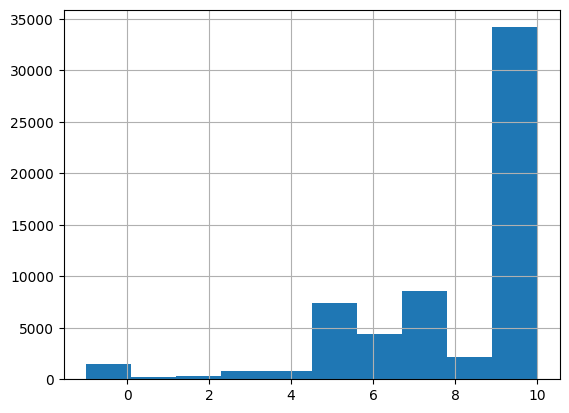